# IKEA Playstore Reviews

The data has been scraped from Playstore website using Selenium script. The data is in raw format with Full review content from each user.
The Data can be used to perform Classification and Clustering into multiple label set (UX, Bug, Other..) after manually labelling the data. The reviews generally talk about the sentiment of the user, but it holds different set of information about the application which is very essential for the App developers. The goal from this data is to identify the reviews nature and sort out the reviews that can be used in productive nature.

This data was a trial run for the script and to identify if the application (IKEA) has the amount of reviews that can be categorized to perform Classification and build a generalized model.

In [1]:
#Kaggle link:https://www.kaggle.com/ounamg008/ikea-playstore-reviews

In [2]:
#importing Libraires

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Natural language processing (NLP)\\Sem Preparation\\IKEA Playstore Reviews\\IKEA Playstore Reviews.csv')
df.head()#first 5 records

,Unnamed: 0,Date,Username,Review,Likes On Reviews
0,0,"August 10, 2019",Tracy Slade,Cannot log in with my IKEA family login. Keeps...,22.0
1,0,"August 24, 2019",Oliver Abernathy,When I attempt to login it just kicks me out a...,3.0
2,0,"August 21, 2019",Mephisto,The application seems promising.. if you could...,1.0
3,0,"June 9, 2019",A Google user,It syncs with desktop and gives the code and l...,75.0
4,0,"August 24, 2019",Florin Visa,"Poor Ux - get better! I followed all steps, in...",1.0


In [5]:
df.tail()#last 5 records

,Unnamed: 0,Date,Username,Review,Likes On Reviews
2849,0,"September 24, 2018",A Google user,Exceptional,NaN
2850,0,"November 23, 2016",Cyntia Esparza,good,NaN
2851,0,"February 25, 2018",A Google user,Good,NaN
2852,0,"November 1, 2018",sarath ammu,Great,NaN
2853,0,"April 17, 2018",Sazs Sedo,Love it Love it,NaN


In [6]:
df.shape#shape of the dataset 2854 records and 5 columns

(2854, 5)

In [7]:
df.info()#summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2854 non-null   int64  
 1   Date              2854 non-null   object 
 2   Username          2854 non-null   object 
 3   Review            2854 non-null   object 
 4   Likes On Reviews  1392 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 111.6+ KB


In [8]:
df1=df.drop(['Unnamed: 0','Date','Username'],axis=1)
df1.head()

,Review,Likes On Reviews
0,Cannot log in with my IKEA family login. Keeps...,22.0
1,When I attempt to login it just kicks me out a...,3.0
2,The application seems promising.. if you could...,1.0
3,It syncs with desktop and gives the code and l...,75.0
4,"Poor Ux - get better! I followed all steps, in...",1.0


In [9]:
#Data Cleaning

In [10]:
#1. Lowercase and Replace

In [11]:
##remove everything other than ^a-z\s
#^a-z:lowe case alphabets
#\s:space

In [12]:
df1['clean_Review']=df1['Review'].str.lower().str.replace('[^a-z\s]','')
df1.head()

,Review,Likes On Reviews,clean_Review
0,Cannot log in with my IKEA family login. Keeps...,22.0,cannot log in with my ikea family login keeps ...
1,When I attempt to login it just kicks me out a...,3.0,when i attempt to login it just kicks me out a...
2,The application seems promising.. if you could...,1.0,the application seems promising if you could a...
3,It syncs with desktop and gives the code and l...,75.0,it syncs with desktop and gives the code and l...
4,"Poor Ux - get better! I followed all steps, in...",1.0,poor ux get better i followed all steps insta...


In [13]:
#2. Tokenize

In [14]:
#In Python tokenization basically refers to splitting up a larger body of text into smaller lines, 
#words or even creating words for a non-English language

In [15]:
df1['clean_Review']=df1['clean_Review'].str.split(' ')
df1.head()

,Review,Likes On Reviews,clean_Review
0,Cannot log in with my IKEA family login. Keeps...,22.0,"[cannot, log, in, with, my, ikea, family, logi..."
1,When I attempt to login it just kicks me out a...,3.0,"[when, i, attempt, to, login, it, just, kicks,..."
2,The application seems promising.. if you could...,1.0,"[the, application, seems, promising, if, you, ..."
3,It syncs with desktop and gives the code and l...,75.0,"[it, syncs, with, desktop, and, gives, the, co..."
4,"Poor Ux - get better! I followed all steps, in...",1.0,"[poor, ux, , get, better, i, followed, all, st..."


In [16]:
#3. Remove Stopwords

In [17]:
import nltk
from nltk.corpus import stopwords

In [18]:
common_stopwords=stopwords.words('english')
print(common_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
common_stopwords.append('ikea')#some words have been added to be removed
common_stopwords.append('app')
common_stopwords.append('shopping')
common_stopwords.append('list')
common_stopwords.append('product')
common_stopwords.append('store')
common_stopwords.append('password')
common_stopwords.append('login')
common_stopwords.append('log')

In [20]:
def drop_stopwords(text):
    return [word for word in text if word not in common_stopwords]

In [21]:
df1['clean_Review']=df1['clean_Review'].apply(drop_stopwords)
df1.head()

,Review,Likes On Reviews,clean_Review
0,Cannot log in with my IKEA family login. Keeps...,22.0,"[cannot, family, keeps, telling, wrong, try, r..."
1,When I attempt to login it just kicks me out a...,3.0,"[attempt, kicks, shows, still, need, ive, rese..."
2,The application seems promising.. if you could...,1.0,"[application, seems, promising, could, actuall..."
3,It syncs with desktop and gives the code and l...,75.0,"[syncs, desktop, gives, code, location, items,..."
4,"Poor Ux - get better! I followed all steps, in...",1.0,"[poor, ux, , get, better, followed, steps, ins..."


In [22]:
#4. Lemmatization

In [23]:
from nltk.stem.wordnet import WordNetLemmatizer

In [24]:
Lemmatizer=WordNetLemmatizer()

In [25]:
def Lemmatization(text):
    return [Lemmatizer.lemmatize(word) for word in text]

In [26]:
df1['clean_Review']=df1['clean_Review'].apply(Lemmatization)
df1.head()

,Review,Likes On Reviews,clean_Review
0,Cannot log in with my IKEA family login. Keeps...,22.0,"[cannot, family, keep, telling, wrong, try, re..."
1,When I attempt to login it just kicks me out a...,3.0,"[attempt, kick, show, still, need, ive, reset,..."
2,The application seems promising.. if you could...,1.0,"[application, seems, promising, could, actuall..."
3,It syncs with desktop and gives the code and l...,75.0,"[syncs, desktop, give, code, location, item, c..."
4,"Poor Ux - get better! I followed all steps, in...",1.0,"[poor, ux, , get, better, followed, step, inst..."


In [27]:
#5. Clean the text

In [28]:
df1['clean_Review']=df1['clean_Review'].apply(lambda x: ' '.join(x))
df1.head()

,Review,Likes On Reviews,clean_Review
0,Cannot log in with my IKEA family login. Keeps...,22.0,cannot family keep telling wrong try reset tel...
1,When I attempt to login it just kicks me out a...,3.0,attempt kick show still need ive reset many ti...
2,The application seems promising.. if you could...,1.0,application seems promising could actually use...
3,It syncs with desktop and gives the code and l...,75.0,syncs desktop give code location item choice h...
4,"Poor Ux - get better! I followed all steps, in...",1.0,poor ux get better followed step installed se...


In [29]:
#Performing Sentimeantl Analysis

In [30]:
df2=df1.drop('Likes On Reviews',axis=1)
df2.head()

,Review,clean_Review
0,Cannot log in with my IKEA family login. Keeps...,cannot family keep telling wrong try reset tel...
1,When I attempt to login it just kicks me out a...,attempt kick show still need ive reset many ti...
2,The application seems promising.. if you could...,application seems promising could actually use...
3,It syncs with desktop and gives the code and l...,syncs desktop give code location item choice h...
4,"Poor Ux - get better! I followed all steps, in...",poor ux get better followed step installed se...


In [31]:
#1. Sentiment analysis using TextBlob

In [32]:
from textblob import TextBlob

In [33]:
df2['Sentimental_score_Texblob']=[round(TextBlob(article).sentiment.polarity,3) for article in df2['clean_Review']]
df2.head()

,Review,clean_Review,Sentimental_score_Texblob
0,Cannot log in with my IKEA family login. Keeps...,cannot family keep telling wrong try reset tel...,0.153
1,When I attempt to login it just kicks me out a...,attempt kick show still need ive reset many ti...,0.550
2,The application seems promising.. if you could...,application seems promising could actually use...,0.000
3,It syncs with desktop and gives the code and l...,syncs desktop give code location item choice h...,-0.183
4,"Poor Ux - get better! I followed all steps, in...",poor ux get better followed step installed se...,0.033


In [34]:
#applying Labels

In [35]:
def sentiment_score(score):
    if score>0.3:
        return 'positive'
    elif score<-0.3:
        return 'negative'
    else:
        return 'netural'

In [36]:
df2['Sentimental_Texblob_Label']=df2['Sentimental_score_Texblob'].apply(sentiment_score)
df2.head()

,Review,clean_Review,Sentimental_score_Texblob,Sentimental_Texblob_Label
0,Cannot log in with my IKEA family login. Keeps...,cannot family keep telling wrong try reset tel...,0.153,netural
1,When I attempt to login it just kicks me out a...,attempt kick show still need ive reset many ti...,0.550,positive
2,The application seems promising.. if you could...,application seems promising could actually use...,0.000,netural
3,It syncs with desktop and gives the code and l...,syncs desktop give code location item choice h...,-0.183,netural
4,"Poor Ux - get better! I followed all steps, in...",poor ux get better followed step installed se...,0.033,netural


In [37]:
df2['Sentimental_Texblob_Label'].value_counts()

netural     1864
positive     573
negative     417
Name: Sentimental_Texblob_Label, dtype: int64

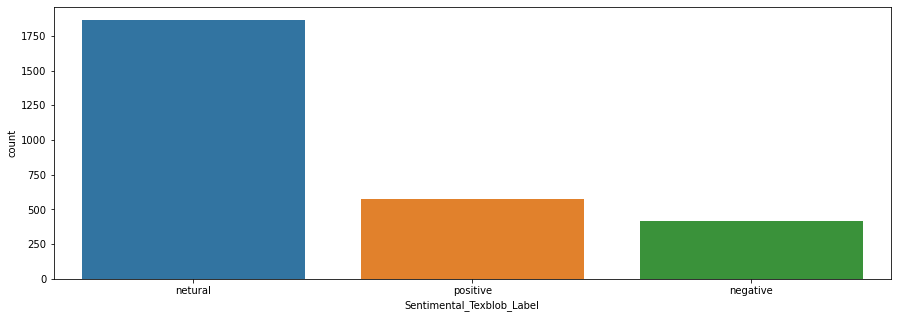

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(df2['Sentimental_Texblob_Label'])
plt.show()

In [39]:
#2. Sentiment Analysis using VADER (Rule Based Algorithm)

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [41]:
df2['Sentimental_score_VADER']=df2['clean_Review'].apply(lambda v: analyzer.polarity_scores(v)['compound'])
df2.head()

,Review,clean_Review,Sentimental_score_Texblob,Sentimental_Texblob_Label,Sentimental_score_VADER
0,Cannot log in with my IKEA family login. Keeps...,cannot family keep telling wrong try reset tel...,0.153,netural,0.6486
1,When I attempt to login it just kicks me out a...,attempt kick show still need ive reset many ti...,0.550,positive,0.8404
2,The application seems promising.. if you could...,application seems promising could actually use...,0.000,netural,0.5423
3,It syncs with desktop and gives the code and l...,syncs desktop give code location item choice h...,-0.183,netural,-0.5719
4,"Poor Ux - get better! I followed all steps, in...",poor ux get better followed step installed se...,0.033,netural,0.5267


In [42]:
df2['Sentimental_VADER_Label']=df2['Sentimental_score_VADER'].apply(sentiment_score)
df2.head()

,Review,clean_Review,Sentimental_score_Texblob,Sentimental_Texblob_Label,Sentimental_score_VADER,Sentimental_VADER_Label
0,Cannot log in with my IKEA family login. Keeps...,cannot family keep telling wrong try reset tel...,0.153,netural,0.6486,positive
1,When I attempt to login it just kicks me out a...,attempt kick show still need ive reset many ti...,0.550,positive,0.8404,positive
2,The application seems promising.. if you could...,application seems promising could actually use...,0.000,netural,0.5423,positive
3,It syncs with desktop and gives the code and l...,syncs desktop give code location item choice h...,-0.183,netural,-0.5719,negative
4,"Poor Ux - get better! I followed all steps, in...",poor ux get better followed step installed se...,0.033,netural,0.5267,positive


In [43]:
df2['Sentimental_VADER_Label'].value_counts()

netural     1195
positive     948
negative     711
Name: Sentimental_VADER_Label, dtype: int64

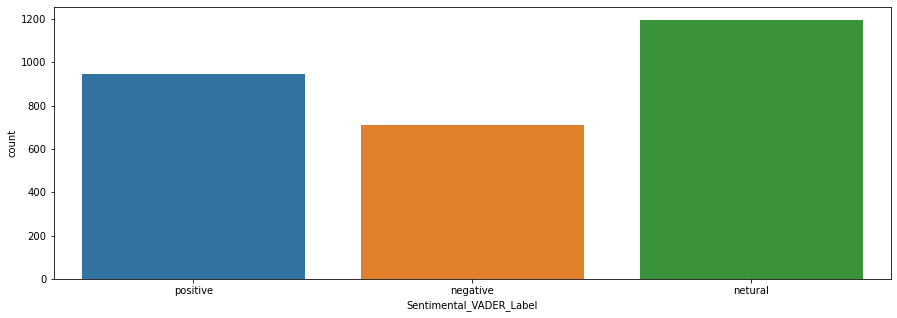

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(df2['Sentimental_VADER_Label'])
plt.show()

In [45]:
#Creating Word CLoud For Positive, Netural and Neagtive words

In [46]:
from wordcloud import WordCloud 

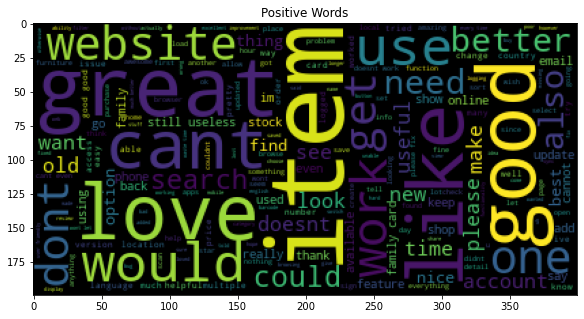

In [47]:
# Positive words
plt.figure(figsize=(15,5))
positive_words = df2[df2['Sentimental_score_VADER'] > 0.3]['clean_Review'].fillna('Not available')
docs_string_positive = ' '.join(positive_words)
positive_words_cloud = WordCloud(background_color='black', stopwords=common_stopwords).generate(docs_string_positive)
plt.imshow(positive_words_cloud)
plt.title('Positive Words')
plt.show()

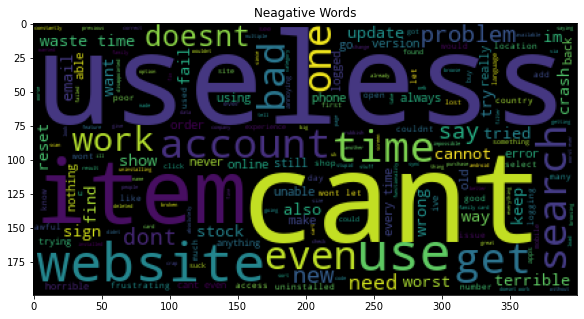

In [48]:
# Negative words
plt.figure(figsize=(15,5))
negative_words=df2[df2['Sentimental_score_VADER']<-0.3]['clean_Review'].fillna('Not available')
docs_string_negative = ' '.join(negative_words)
negative_word_cloud=WordCloud(background_color='black', stopwords=common_stopwords).generate(docs_string_negative)
plt.imshow(negative_word_cloud)
plt.title('Neagative Words')
plt.show()

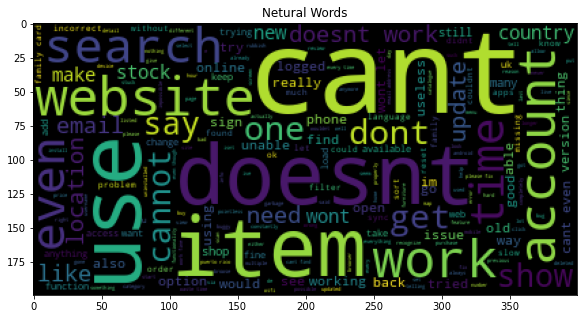

In [49]:
#Netural words
plt.figure(figsize=(15,5))
netual_words=df2[(df2['Sentimental_score_VADER'] < 0.3)  & (df2['Sentimental_score_VADER'] > -0.3) ]['clean_Review'].fillna('Not available')
docs_string_netual = ' '.join(netual_words)
netual_word_cloud=WordCloud(background_color='black', stopwords=common_stopwords).generate(docs_string_netual)
plt.imshow(netual_word_cloud)
plt.title('Netural Words')
plt.show()

In [50]:
#MODEL Building using Sentiment LABEL of VADER ANALYSIS

In [51]:
df3=df2.iloc[:,[1,5]]
df3.head()

,clean_Review,Sentimental_VADER_Label
0,cannot family keep telling wrong try reset tel...,positive
1,attempt kick show still need ive reset many ti...,positive
2,application seems promising could actually use...,positive
3,syncs desktop give code location item choice h...,negative
4,poor ux get better followed step installed se...,positive


In [52]:
#Building LSTM model

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [54]:
vocabsize=4500
tokenizer=Tokenizer(num_words=vocabsize,split=' ')#split on space
tokenizer.fit_on_texts(df3['clean_Review'].values)

#fit_on_texts :Updates internal vocabulary based on a list of texts. 
    #This method creates the vocabulary index based on word frequency. 
    #So if you give it something like, "The cat sat on the mat."
    #It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 
    #0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).

In [55]:
vocab_size=tokenizer.word_index#word_index
vocab_size

{'cant': 1,
 'time': 2,
 'item': 3,
 'work': 4,
 'doesnt': 5,
 'even': 6,
 'use': 7,
 'website': 8,
 'good': 9,
 'account': 10,
 'useless': 11,
 'one': 12,
 'product': 13,
 'get': 14,
 'search': 15,
 'dont': 16,
 'like': 17,
 'family': 18,
 'old': 19,
 'great': 20,
 'let': 21,
 'keep': 22,
 'list': 23,
 'email': 24,
 'need': 25,
 'would': 26,
 'wont': 27,
 'new': 28,
 'say': 29,
 'find': 30,
 'im': 31,
 'update': 32,
 'also': 33,
 'show': 34,
 'make': 35,
 'please': 36,
 'cannot': 37,
 'love': 38,
 'card': 39,
 'back': 40,
 'try': 41,
 'stock': 42,
 'go': 43,
 'see': 44,
 'sign': 45,
 'want': 46,
 'version': 47,
 'better': 48,
 'fix': 49,
 'option': 50,
 'online': 51,
 'using': 52,
 'every': 53,
 'really': 54,
 'could': 55,
 'way': 56,
 'thing': 57,
 'tried': 58,
 'problem': 59,
 'phone': 60,
 'country': 61,
 'still': 62,
 'location': 63,
 'issue': 64,
 'much': 65,
 'add': 66,
 'bad': 67,
 'used': 68,
 'waste': 69,
 'logged': 70,
 'able': 71,
 'language': 72,
 'order': 73,
 'look': 74,

In [56]:
len(vocab_size)

4754

In [57]:
X3=tokenizer.texts_to_sequences(df3['clean_Review'].values)
#texts_to_sequences: Transforms each text in texts to a sequence of integers. 
    #So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. 
    #Nothing more, nothing less, certainly no magic involved.

In [58]:
X3

[[37,
  18,
  22,
  233,
  79,
  41,
  91,
  131,
  254,
  79,
  283,
  2032,
  226,
  41,
  150,
  638,
  2033,
  131,
  132,
  711,
  220,
  26,
  38,
  41,
  101,
  48,
  431,
  220,
  29,
  314],
 [355,
  1454,
  34,
  62,
  25,
  90,
  91,
  82,
  2,
  551,
  639,
  133,
  46,
  458,
  39,
  16,
  2034,
  90,
  58,
  8,
  102,
  5,
  57],
 [234,
  221,
  2035,
  55,
  210,
  7,
  90,
  83,
  245,
  10,
  112,
  211,
  177,
  284,
  712,
  1455,
  23,
  93,
  165,
  2036,
  137,
  2037,
  20],
 [1456,
  409,
  101,
  186,
  63,
  3,
  459,
  246,
  5,
  34,
  1457,
  272,
  273,
  52,
  12,
  2038,
  5,
  21,
  73,
  299,
  2039,
  73,
  713,
  3,
  12,
  1457,
  33,
  134,
  5,
  2040,
  640,
  2,
  33,
  300,
  22,
  123,
  53,
  2,
  87],
 [201,
  769,
  14,
  48,
  1458,
  974,
  263,
  154,
  18,
  10,
  10,
  94,
  432,
  169,
  55,
  552,
  10,
  975,
  10,
  94,
  433,
  24,
  94,
  1459,
  2041,
  8,
  301,
  55,
  30,
  94,
  641,
  1460,
  356,
  302,
  165,
  94,
  39,


In [59]:
X3 = pad_sequences(X3)#pad_sequences is used to ensure that all sequences in a list have the same length.

In [60]:
X3.shape

(2854, 151)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout,SpatialDropout1D

In [62]:
embed_dim = 128
lstm_out = 196

model=Sequential()
model.add(Embedding(input_dim=vocabsize,output_dim=embed_dim,input_length=X3.shape[1]))
#vocabSize:input_dim (Integer. Size of the vocabulary, i.e. maximum integer index + 1.)
#embed_dim:output_dim (Integer. Dimension of the dense embedding.)
#input_length: Length of input sequences
model.add(SpatialDropout1D(0.4))
model.add(LSTM(units=lstm_out,dropout=0.3,recurrent_dropout=0.3))
#units: Positive integer, dimensionality of the output space.
model.add(Dense(3,activation='Softmax'))

In [63]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [64]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 151, 128)          576000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 151, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 3)                 591       
Total params: 831,391
Trainable params: 831,391
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
from sklearn.model_selection import train_test_split

Y3 = pd.get_dummies(df3['Sentimental_VADER_Label']).values
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X3,Y3, test_size = 0.15, random_state = 42)
print(X_train1.shape,Y_train1.shape)
print(X_test1.shape,Y_test1.shape)

(2425, 151) (2425, 3)
(429, 151) (429, 3)


In [66]:
batch_size = 32
model.fit(X_train1, Y_train1, epochs = 5, batch_size=batch_size, verbose = 1)

Epoch 1/5
76/76 [==============================] - 89s 1s/step - loss: 1.0413 - accuracy: 0.4408
Epoch 2/5
76/76 [==============================] - 76s 1s/step - loss: 0.8191 - accuracy: 0.6573
Epoch 3/5
76/76 [==============================] - 77s 1s/step - loss: 0.5605 - accuracy: 0.7946
Epoch 4/5
76/76 [==============================] - 60s 791ms/step - loss: 0.3990 - accuracy: 0.8561
Epoch 5/5
76/76 [==============================] - 59s 780ms/step - loss: 0.3022 - accuracy: 0.8994


In [67]:
score,acc = model.evaluate(X_test1, Y_test1, verbose = 1, batch_size = batch_size)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (acc))

14/14 [==============================] - 3s 106ms/step - loss: 0.8426 - accuracy: 0.7226
score: 0.84
accuracy: 0.72
